In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [71]:
df = pd.read_csv('customer_data.csv')
df.head()

,customer_id,order_id,order_date,age,gender,income,purchase_amount,product_category
0,C15796,O01001,02/02/2024,18,Female,29617,7207,Travel
1,C861,O01002,04/08/2024,68,Female,21472,2388,Beauty
2,C5391,O01003,14/12/2024,36,Male,41593,838,Home
3,C11965,O01004,10/06/2024,62,Male,44395,320,Grocery
4,C11285,O01005,23/01/2024,44,Male,23272,1486,Beauty


<span style="font-size: 30px;">Data Overview</span>


In [76]:
print("Shape of data:", df.shape)
print("\nDataset Info:")
df.info()

print("\nMissing values:")
df.isnull().sum()

print("\nDuplicate rows:")
df.duplicated().sum()

Shape of data: (200000, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   customer_id       200000 non-null  object
 1   order_id          200000 non-null  object
 2   order_date        200000 non-null  object
 3   age               200000 non-null  int64 
 4   gender            200000 non-null  object
 5   income            200000 non-null  int64 
 6   purchase_amount   200000 non-null  int64 
 7   product_category  200000 non-null  object
dtypes: int64(3), object(5)
memory usage: 12.2+ MB

Missing values:

Duplicate rows:


0

<span style="font-size: 30px;">Handling missing values</span>


In [78]:
df.fillna({
    'age': df['age'].median(),
    'gender': 'Unknown',
    'income': df['income'].mean()
}, inplace=True)

In [80]:
df.drop_duplicates(inplace=True)

<span style="font-size:24px; font-weight:bold;">Descriptive Statistics</span>


In [82]:
df.describe()

,age,income,purchase_amount
count,200000.000000,200000.000000,200000.000000
mean,44.054695,28393.570580,2986.496655
std,15.277334,7967.487157,2022.017684
min,18.000000,15000.000000,100.000000
25%,31.000000,22864.000000,1412.000000
50%,44.000000,26653.000000,2458.000000
75%,57.000000,31933.250000,4231.000000
max,70.000000,150000.000000,10000.000000


<span style="font-size:35px; font-weight:bold;">Univariate Analysis</span>

<span style="font-size:25px; font-weight:bold;">Age Distribution</span>


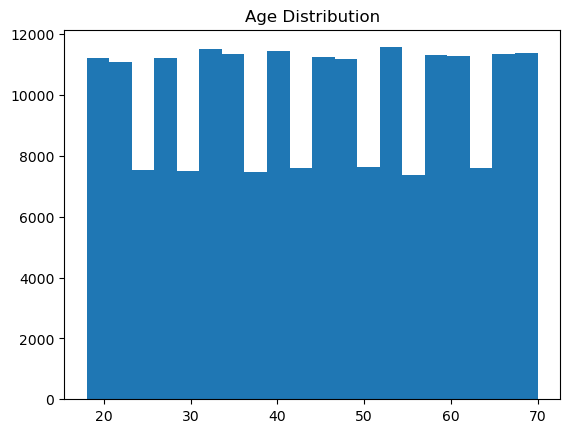

In [85]:
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.show()

<span style="font-size:25px; font-weight:bold;">Gender Distribution</span>

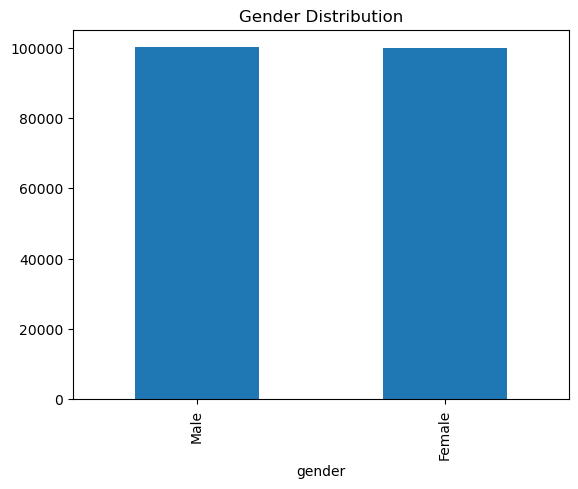

In [38]:
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.show()

<span style="font-size:25px; font-weight:bold;">Income Distribution</span>

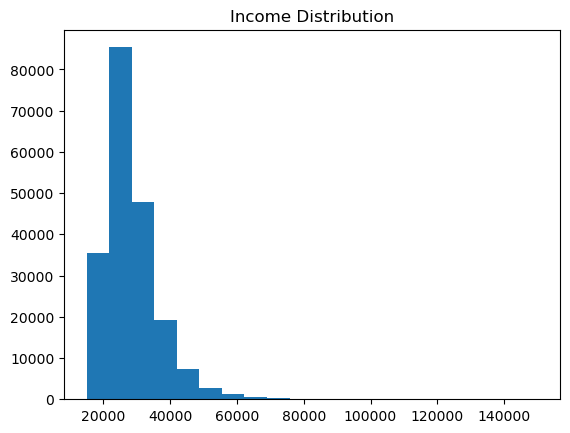

In [87]:
plt.hist(df['income'], bins=20)
plt.title('Income Distribution')
plt.show()

<span style="font-size:25px; font-weight:bold;">Customer Purchase Behaviour</span>

In [89]:
customer_spend = df.groupby('customer_id')['purchase_amount'].sum().reset_index()

customer_spend.sort_values(by='purchase_amount', ascending=False).head()

,customer_id,purchase_amount
17929,C8117,88295
11278,C2070,80585
9947,C18871,78827
452,C10317,77280
16355,C6686,76442


<span style="font-size:25px; font-weight:bold;">Average Order Value</span>

In [91]:
aov = df['purchase_amount'].mean()
print("Average Order Value:", aov)

Average Order Value: 2986.496655


<span style="font-size:25px; font-weight:bold;">RFM Analysis (Recency, Frequency, Monetary)</span>

In [98]:
import datetime as dt

NOW = dt.datetime(2025, 1, 1)

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (NOW - pd.to_datetime(x, dayfirst=True).max()).days,
    'order_id': 'count',
    'purchase_amount': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm.head()

,customer_id,recency,frequency,monetary
0,C001,2,9,26964
1,C002,13,12,32048
2,C003,6,8,27630
3,C004,35,13,30857
4,C005,12,8,20662


<span style="font-size:25px; font-weight:bold;">Customer Segmentation based on Spending</span>

In [100]:
df['spending_segment'] = pd.qcut(df['purchase_amount'], 3, labels=['Low', 'Medium', 'High'])
df['spending_segment'].value_counts()

spending_segment
Low       66720
High      66651
Medium    66629
Name: count, dtype: int64

<span style="font-size:25px; font-weight:bold;">Behaviour by Segment </span>

In [140]:
segment_analysis = df.groupby('spending_segment').agg({
    'purchase_amount': ['mean', 'sum', 'count']
})

segment_analysis

C:\Users\akash\AppData\Local\Temp\ipykernel_26532\204077968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('spending_segment').agg({


purchase_amount                  
                            mean        sum  count
spending_segment                                  
Low                  1038.143855   69264958  66720
Medium               2542.498567  169404137  66629
High                 5380.718009  358630236  66651

<span style="font-size:25px; font-weight:bold;">Correlation Analysis</span>

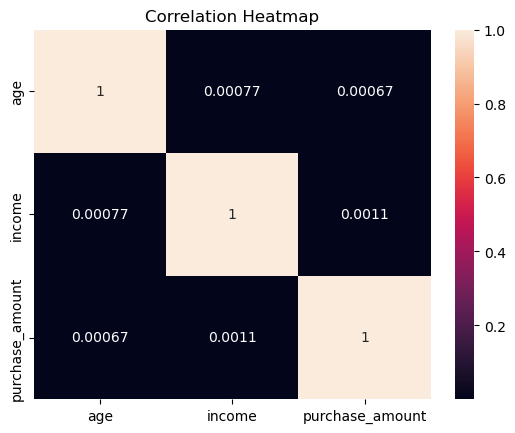

In [143]:
corr = df[['age', 'income', 'purchase_amount']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Converting dates

In [126]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

In [128]:
print(df['order_date'].isna().sum(), "invalid dates found")

0 invalid dates found



Extracting month


In [134]:
df['month'] = df['order_date'].dt.to_period('M')

Group + Plot

<span style="font-size:25px; font-weight:bold;">Monthly Purchase Trend</span>

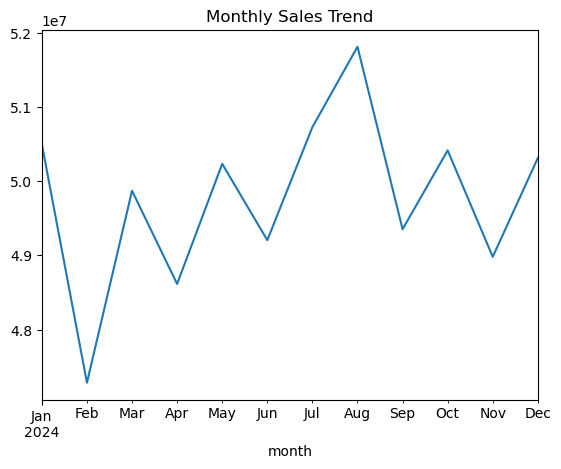

In [145]:
monthly_sales = df.groupby('month')['purchase_amount'].sum()

monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.show()

<span style="font-size:25px; font-weight:bold;">Key Insights generator</span>

In [155]:
print("Top Insights:")
print("1. High spenders contribute most revenue.")
print("2. Recent active customers are more valuable.")
print("3. Income moderately affects purchase behavior.")

Top Insights:
1. High spenders contribute most revenue.
2. Recent active customers are more valuable.
3. Income moderately affects purchase behavior.
